In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, f1_score
from sklearn.metrics import mean_squared_error

In [2]:
df_clean=pd.read_csv(r"C:\Users\Dima\Downloads\Dima\Cleaned_df.csv",dtype={'col':np.float})
df_clean.rename(columns={'Unnamed: 0':'Country'},inplace=True)
df_clean.set_index('Country',inplace=True)
df_clean.drop('Unnamed: 8',axis=1,inplace=True)
df_clean.drop('Most Obese Countries',axis=1,inplace=True) 
df_clean.drop('Obesity ',axis=1,inplace=True) 
df_clean.drop('Birth Life Expectancy ',axis=1,inplace=True) 
df_clean = df_clean.replace('0.0',np.nan, regex=True)
df_clean = df_clean.replace(0.0,np.nan, regex=True)
df_clean = df_clean.replace(0,np.nan, regex=True)
df_clean.dropna(axis=1,thresh=100,inplace=True)
index_object=[]
for i in df_clean.columns:
    if(df_clean[i].dtypes==object):
        index_object.append(i)
for i in index_object:
    df_clean.drop(i,axis=1,inplace=True)
df_clean

,Alcohol,All Cancers,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,Congenital Anomalies,...,Death Rate by Country,Depression Rates by Country,Diabetes Rates by Country,Health Care Costs by Country,Infant Mortality Rate by Country,Lactose Intolerance by Country,Obesity Rates by Country,Suicide Rate by Country,Total Fertility Rate,Vaccination Rates by Country
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,11247.529167,1498.662628,68.035126,37.797292,160.638491,6.390294e+04,208.830038,1611.109571,269.305706,26680.163491,...,12.6,0.056,0.06,9432800.0,2.19,9432800.0,0.245,21.2,1.4,0.98
Mongolia,6372.340102,577.962527,197.680887,97.037384,34.094216,3.481675e+04,206.532270,145.228247,188.173846,9304.442678,...,6.3,0.042,0.07,3378078.0,13.22,3378078.0,0.206,17.9,2.9,0.99
Russia,188532.731458,21992.323423,1050.728126,817.232987,3517.020534,1.061629e+06,5312.014417,24152.153461,5166.079955,298435.974790,...,12.7,0.055,0.06,145805947.0,4.36,145805947.0,0.231,25.1,1.6,0.97
Guatemala,14787.509827,2984.733629,498.052790,800.825890,93.160954,1.313068e+05,1270.213771,734.538288,990.730910,15274.813277,...,4.8,0.037,0.13,18584039.0,20.06,18584039.0,0.212,5.9,2.9,0.92
Slovenia,2796.587398,120.578404,4.781557,2.078938,77.752281,8.025948e+03,32.015645,309.345974,47.607680,1196.220925,...,9.9,0.051,0.06,2078034.0,1.76,2078034.0,0.202,19.8,1.6,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,111929.631992,23088.710939,7680.013883,1810.497569,876.047211,6.805329e+05,2326.392038,8010.965052,6414.612356,84363.346419,...,6.3,0.040,0.06,98953541.0,16.70,98953541.0,0.021,7.5,2.0,0.96
Antigua And Barbuda,118.621398,6.003048,1.890030,0.851982,1.047840,5.816787e+02,7.511154,13.866746,4.064053,75.983111,...,6.3,0.051,0.12,99509.0,5.38,99509.0,0.189,0.4,2.0,0.99
United Arab Emirates,7174.497611,1677.412179,1018.711406,93.958819,344.185990,6.132742e+04,144.399869,844.640331,533.092668,14258.992563,...,1.5,0.051,0.16,10081785.0,5.62,10081785.0,0.317,6.4,1.4,0.96


In [3]:
def outlier_detection_zscore_dist(df):
    df_copy =df.copy()
    for col in df_copy:
        if (df_copy[col].dtypes!=object):
            z_score=(df_copy[col]-df_copy[col].mean())/df_copy[col].std()
            outliers=abs(z_score) >3
            df_copy.loc[outliers,[col]]=np.nan
    return df_copy
    


values_zscore=outlier_detection_zscore_dist(df_clean)
for i in values_zscore.columns:
    print(values_zscore[i].isna().sum(),  i)

2 Alcohol
3 All Cancers
1 Anemia
3 Asthma
4 Birth Trauma
2 Bladder Cancer
4 Breast Cancer
2 Cervical Cancer
3 Colon-Rectum Cancers
2 Congenital Anomalies
4 Coronary Heart Disease
1 Diabetes Mellitus
2 Diarrhoeal diseases
2 Drownings
7 Drug Use
3 Endocrine Disorders
2 Falls
21 Fires
18 Hepatitis C
2 HIV/AIDS
5 Hypertension
2 Inflammatory/Heart
2 Kidney Disease
2 Leukemia
4 Liver Cancer
1 Liver Disease
1 Low Birth Weight
2 Lung Cancers
7 Malaria
6 Malnutrition
3 Multiple Sclerosis
3 Oesophagus Cancer
2 Oral Cancer
3 Other Injuries
3 Other Neoplasms
4 Ovary Cancer
2 Pancreas Cancer
2 Peptic Ulcer Disease
3 Poisonings
3 Prostate Cancer
3 Rheumatic Heart Disease
7 Road Traffic Accidents
2 Skin Cancers
2 Skin Disease
3 Stomach Cancer
2 Stroke
4 Suicide
5 Tuberculosis
3 Uterin Cancer
32 Electricity by Renewable Sources 
12 Urban Population Growth Rates 
3 Infant Mortality Rates 
4 Internet Users 
2 Gross Domestic Product (GDP) 
7 Investments 
15 Irrigated Land 
4 Maternal Mortality Rates 
6 I

In [4]:
for i in values_zscore.columns:
    if(values_zscore[i].dtypes!=object):
        values_zscore[i].fillna(values_zscore[i].median(), inplace=True)
values_zscore.info()
values_zscore


<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, Belarus to Republic of the Congo
Columns: 125 entries, Alcohol to Vaccination Rates by Country
dtypes: float64(125)
memory usage: 170.3+ KB


,Alcohol,All Cancers,Anemia,Asthma,Birth Trauma,Bladder Cancer,Breast Cancer,Cervical Cancer,Colon-Rectum Cancers,Congenital Anomalies,...,Death Rate by Country,Depression Rates by Country,Diabetes Rates by Country,Health Care Costs by Country,Infant Mortality Rate by Country,Lactose Intolerance by Country,Obesity Rates by Country,Suicide Rate by Country,Total Fertility Rate,Vaccination Rates by Country
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,11247.529167,1498.662628,68.035126,37.797292,160.638491,6.390294e+04,208.830038,1611.109571,269.305706,26680.163491,...,12.6,0.056,0.06,9432800.0,2.19,9432800.0,0.245,21.2,1.4,0.98
Mongolia,6372.340102,577.962527,197.680887,97.037384,34.094216,3.481675e+04,206.532270,145.228247,188.173846,9304.442678,...,6.3,0.042,0.07,3378078.0,13.22,3378078.0,0.206,17.9,2.9,0.99
Russia,188532.731458,21992.323423,1050.728126,817.232987,3517.020534,1.061629e+06,5312.014417,24152.153461,5166.079955,298435.974790,...,12.7,0.055,0.06,145805947.0,4.36,145805947.0,0.231,25.1,1.6,0.97
Guatemala,14787.509827,2984.733629,498.052790,800.825890,93.160954,1.313068e+05,1270.213771,734.538288,990.730910,15274.813277,...,4.8,0.037,0.13,18584039.0,20.06,18584039.0,0.212,5.9,2.9,0.92
Slovenia,2796.587398,120.578404,4.781557,2.078938,77.752281,8.025948e+03,32.015645,309.345974,47.607680,1196.220925,...,9.9,0.051,0.06,2078034.0,1.76,2078034.0,0.202,19.8,1.6,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,111929.631992,23088.710939,7680.013883,1810.497569,876.047211,6.805329e+05,2326.392038,8010.965052,6414.612356,84363.346419,...,6.3,0.040,0.06,98953541.0,16.70,98953541.0,0.021,7.5,2.0,0.96
Antigua And Barbuda,118.621398,6.003048,1.890030,0.851982,1.047840,5.816787e+02,7.511154,13.866746,4.064053,75.983111,...,6.3,0.051,0.12,99509.0,5.38,99509.0,0.189,0.4,2.0,0.99
United Arab Emirates,7174.497611,1677.412179,1018.711406,93.958819,344.185990,6.132742e+04,144.399869,844.640331,533.092668,14258.992563,...,1.5,0.051,0.16,10081785.0,5.62,10081785.0,0.317,6.4,1.4,0.96


In [5]:
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        print(score , i)
        if(score>=0.5 or score<=-0.5):
            pass  

0.014664916871865727 Alcohol
-0.0714034196133999 All Cancers
-0.2696195154833065 Anemia
-0.2353224374239035 Asthma
0.08633836637777142 Birth Trauma
-0.20129009612324963 Bladder Cancer
-0.3497256782018828 Breast Cancer
0.13603858574632013 Cervical Cancer
-0.08395487964206742 Colon-Rectum Cancers
-0.11283089941707707 Congenital Anomalies
-0.21303994229014034 Coronary Heart Disease
-0.3480817244140434 Diabetes Mellitus
-0.15803852413483951 Diarrhoeal diseases
-0.10210863572701562 Drownings
-0.07320121382481191 Drug Use
-0.11599863886995164 Endocrine Disorders
-0.36298835444026045 Falls
0.06669980096856554 Fires
-0.36113917779479304 Hepatitis C
-0.21544210851864717 HIV/AIDS
-0.1920734139149344 Hypertension
-0.20129009612324963 Inflammatory/Heart
0.06316790284970386 Kidney Disease
-0.026365973545022816 Leukemia
-0.2752987386445265 Liver Cancer
-0.22050132258044358 Liver Disease
0.12895527501387077 Low Birth Weight
-0.08621878271725848 Lung Cancers
-0.427164646634093 Malaria
0.14056141197049

In [6]:
machin_value=[]
for i in values_zscore.columns:
    if(i!='Life Expectancy'):
        score=values_zscore['Life Expectancy'].corr(values_zscore[i])
        if(score>=0.5 or score<=-0.5):
            print("Taken To The machine Learinging :", i)
            machin_value.append(i)
machin_value.append('Life Expectancy')  
values_zscore[machin_value]

Taken To The machine Learinging : Urban Population Growth Rates 
Taken To The machine Learinging : Older Population 
Taken To The machine Learinging : Unimproved Drinking Water Sources 
Taken To The machine Learinging : Electrification 
Taken To The machine Learinging : Unimproved Sanitation 
Taken To The machine Learinging : Urban Population 
Taken To The machine Learinging : Median Age 
Taken To The machine Learinging : Young Population 
Taken To The machine Learinging : Best Countries To Live in
Taken To The machine Learinging : Cheapest Countries To Live in
Taken To The machine Learinging : Fourth World Countries
Taken To The machine Learinging : GDP per Capita by Country
Taken To The machine Learinging : Most Expensive Countries To Live in
Taken To The machine Learinging : Poorest Countries in the World
Taken To The machine Learinging : Average Height by Country
Taken To The machine Learinging : Countries by IQ - Average IQ by Country
Taken To The machine Learinging : Birth Rate b

,Urban Population Growth Rates,Older Population,Unimproved Drinking Water Sources,Electrification,Unimproved Sanitation,Urban Population,Median Age,Young Population,Best Countries To Live in,Cheapest Countries To Live in,...,Most Expensive Countries To Live in,Poorest Countries in the World,Average Height by Country,Countries by IQ - Average IQ by Country,Birth Rate by Country,Depression Rates by Country,Infant Mortality Rate by Country,Obesity Rates by Country,Total Fertility Rate,Life Expectancy
Country,,,,,,,,,,,,,,,,,,,,,
Belarus,0.0044,0.159,0.003,1.00,0.057,0.80,40.9,0.161,0.8230,504.0,...,504.0,6330.0,178.69,101.60,10.0,0.056,2.19,0.245,1.4,75.058
Mongolia,0.0163,0.048,0.356,0.91,0.403,0.69,29.8,0.270,0.7370,603.0,...,603.0,3670.0,170.67,91.03,18.2,0.042,13.22,0.206,2.9,70.334
Russia,0.0018,0.155,0.031,1.00,0.278,0.75,40.3,0.172,0.8240,656.0,...,656.0,10690.0,176.65,96.29,10.7,0.055,4.36,0.231,1.6,72.842
Guatemala,0.0268,0.047,0.072,0.92,0.361,0.52,23.2,0.337,0.6630,857.0,...,857.0,4490.0,164.36,47.72,24.6,0.037,20.06,0.212,2.9,74.828
Slovenia,0.0056,0.212,0.005,1.00,0.009,0.55,44.9,0.148,0.9170,1175.0,...,1175.0,25910.0,180.98,98.60,9.2,0.051,1.76,0.202,1.6,81.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.0298,0.069,0.024,1.00,0.220,0.37,31.9,0.226,0.7040,639.0,...,639.0,2660.0,168.89,89.53,15.2,0.040,16.70,0.021,2.0,75.670
Antigua And Barbuda,0.0055,0.089,0.021,1.00,0.086,0.24,32.7,0.225,0.7780,1465.0,...,1465.0,14250.0,178.84,70.48,15.6,0.051,5.38,0.189,2.0,77.340
United Arab Emirates,0.0171,0.019,0.004,1.00,0.024,0.87,38.4,0.145,0.8900,1576.0,...,1576.0,43470.0,174.08,82.05,9.8,0.051,5.62,0.317,1.4,78.318


In [7]:
# With Normalize the data 
df_scale=values_zscore[machin_value]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_scale)
df_scaled=pd.DataFrame(x_scaled)
df_scaled
X_1=df_scaled.loc[:,0:20]
y_1=df_scaled.loc[:,21]
m_1=linear_model.LinearRegression()
m_1.fit(X_1,y_1)
print("Slope:",m_1.coef_)
print("Intercept:",m_1.intercept_)
df_scaled
## מקדמים של המשתנים 

Slope: [ 0.10882169  0.12989006  0.0442402   0.14871971 -0.1565451   0.04660221
  0.00595421  0.09220248  0.16815532  0.04789886 -0.05016023  0.00482368
  0.04789886  0.08849875 -0.09043276  0.02154478 -0.03478151 -0.04140542
 -0.29027584 -0.02644854 -0.18801763]
Intercept: 0.4769091313232036


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.075571,0.674312,0.003339,1.000000,0.060086,0.770115,0.772189,0.094488,0.761989,0.080950,...,0.080950,0.092322,0.757619,0.923138,0.056022,0.794118,0.009132,0.495575,0.081633,0.681041
1,0.284710,0.165138,0.592654,0.907216,0.431330,0.643678,0.443787,0.380577,0.609236,0.134377,...,0.134377,0.051798,0.375714,0.756655,0.285714,0.382353,0.164091,0.409292,0.387755,0.528102
2,0.029877,0.655963,0.050083,1.000000,0.297210,0.712644,0.754438,0.123360,0.763766,0.162979,...,0.162979,0.158745,0.660476,0.839502,0.075630,0.764706,0.039618,0.464602,0.122449,0.609298
3,0.469244,0.160550,0.118531,0.917526,0.386266,0.448276,0.248521,0.556430,0.477798,0.271452,...,0.271452,0.064290,0.075238,0.074500,0.464986,0.235294,0.260185,0.422566,0.387755,0.673595
4,0.096661,0.917431,0.006678,1.000000,0.008584,0.482759,0.890533,0.060367,0.928952,0.443065,...,0.443065,0.390615,0.866667,0.875886,0.033613,0.647059,0.003091,0.400442,0.122449,0.895947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.521968,0.261468,0.038397,1.000000,0.234979,0.275862,0.505917,0.265092,0.550622,0.153805,...,0.153805,0.036411,0.290952,0.733029,0.201681,0.323529,0.212981,0.000000,0.204082,0.700855
169,0.094903,0.353211,0.033389,1.000000,0.091202,0.126437,0.529586,0.262467,0.682060,0.599568,...,0.599568,0.212980,0.764762,0.432982,0.212885,0.647059,0.053948,0.371681,0.204082,0.754921
170,0.298770,0.032110,0.005008,1.000000,0.024678,0.850575,0.698225,0.052493,0.880995,0.659471,...,0.659471,0.658135,0.538095,0.615215,0.050420,0.647059,0.057319,0.654867,0.081633,0.786584
171,0.360281,0.233945,0.253756,1.000000,0.170601,0.804598,0.387574,0.377953,0.642984,0.192661,...,0.192661,0.106490,0.565238,0.615215,0.305322,0.529412,0.369907,0.564159,0.265306,0.662393


In [8]:
# With Normalize the data 
print("R2:",r2_score(y_1,m_1.predict(X_1.values)))

R2: 0.8870955094867885


In [9]:
## With Normalize Data
m_1.score(X_1,y_1)

0.8870955094867885

In [10]:
## With Normalize Data
predicted_1=m_1.predict(X_1.values)
predicted_1

array([0.7541583 , 0.60411884, 0.71732369, 0.6007658 , 0.85611861,
       0.66222856, 0.73821591, 0.8205067 , 0.82064459, 0.81429711,
       0.62962586, 0.68751751, 0.9507482 , 0.61251939, 0.82798592,
       0.6192129 , 0.94022467, 0.29158201, 0.67264619, 0.78208311,
       0.18454666, 0.62447162, 0.69367141, 0.66389561, 0.91940579,
       0.57488229, 0.76101323, 0.90702348, 0.89709211, 0.9086724 ,
       0.69990061, 0.89675294, 0.68380778, 0.81973043, 0.66136231,
       0.8284851 , 0.79868279, 0.78262382, 0.90180962, 0.60546157,
       0.25896302, 0.93118744, 0.92268707, 0.60865461, 0.78207923,
       0.71076962, 0.90460023, 0.32665333, 0.66039539, 0.24004605,
       0.7564005 , 0.93580369, 0.78091274, 0.9454529 , 0.30075115,
       0.41385599, 0.58432424, 0.46432423, 0.33767597, 0.44081366,
       0.52640385, 0.56907576, 0.52418233, 0.93828321, 0.70605651,
       0.17450648, 0.30289781, 0.2535951 , 0.33204399, 0.36018127,
       0.3421893 , 0.8326032 , 0.25959798, 0.47884106, 0.74914

In [11]:
predicted_1=m_1.predict(X_1.values)
df_new1=pd.DataFrame({'Predict_values':predicted_1},y_1)
df_new1

,Predict_values
21,
0.681041,0.754158
0.528102,0.604119
0.609298,0.717324
0.673595,0.600766
0.895947,0.856119
...,...
0.700855,0.673244
0.754921,0.700891
0.786584,0.824867


In [12]:
## With no Normalize Data
X_2=values_zscore[machin_value].drop('Life Expectancy',axis=1)
y_2=values_zscore['Life Expectancy']
m_2=linear_model.LinearRegression()
m_2.fit(X_2,y_2)
print("Slope:",m_2.coef_)
print("Intercept:",m_2.intercept_)


Slope: [ 5.90735380e+01  1.84038729e+01  2.28128786e+00  4.73572612e+00
 -5.18815999e+00  1.65453912e+00  5.44123028e-03  7.47493459e+00
  9.22554431e+00  7.98435058e-04 -2.58655957e+00  2.06608733e-06
  7.98434908e-04  4.16445658e-05 -1.33013666e-01  1.04815761e-02
 -3.00933113e-02 -3.76156043e+01 -1.25962911e-01 -1.80739466e+00
 -1.18520173e+00]
Intercept: 87.80963538306746


In [13]:
## With no Normalize Data
print("R2:",r2_score(y_2,m_2.predict(X_2.values)))

R2: 0.8870955094867885


In [14]:
## With no Normalize Data
m_2.score(X_2,y_2)


0.8870955094867885

In [15]:
## With no Normalize Data
predicted_2=m_2.predict(X_2.values)
df_new2=pd.DataFrame({'Predict_values':predicted_2},y_2)
df_new2

,Predict_values
Life Expectancy,
75.058,77.316441
70.334,72.682023
72.842,76.178694
74.828,72.578454
81.696,80.465792
...,...
75.670,74.817163
77.340,75.671131
78.318,79.500484


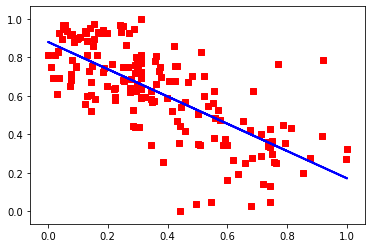

In [16]:
#With normalize Data
m_1.fit(X_1.iloc[:,0:1],y_1)
plt.scatter(x=X_1.iloc[:,0:1],y=y_1,c='r',marker='s')
plt.plot(X_1.iloc[:,0:1],m_1.predict(X_1.iloc[:,0:1]),'k',color='blue',linewidth=2)


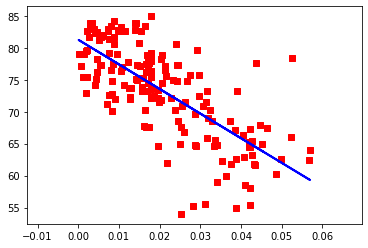

In [17]:
#With no normalize
m_2.fit(X_2.iloc[:,0:1],y_2)
plt.scatter(x=X_2.iloc[:,0:1],y=y_2,c='r',marker='s')
plt.plot(X_2.iloc[:,0:1],m_2.predict(X_2.iloc[:,0:1]),'k',color='blue',linewidth=2)


In [18]:
#Mean השונות של  NORMALIZED DATA
m_1.fit(X_1,y_1)
y_predct_1=m_1.predict(X_1)
mean_error=mean_squared_error(y_1.tolist(),y_predct_1)
print(mean_error)

0.006207557379334482


In [19]:
#Mean השונות של  NOT NORMALIZED DATA
m_2.fit(X_2,y_2)
y_predct_2=m_2.predict(X_2)
mean_error=mean_squared_error(y_2.tolist(),y_predct_2)
print(mean_error)

5.9224352306981025


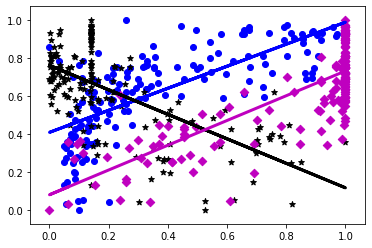

In [20]:
##NORMALIZED DATA Graph of vectors
#3 linear rows that in data
m_1_2=linear_model.LinearRegression()
m_1_3=linear_model.LinearRegression()
m_1_4=linear_model.LinearRegression()
m_1_2.fit(X_1.iloc[:,1:2],y_1)
m_1_3.fit(X_1.iloc[:,2:3],y_1)
m_1_4.fit(X_1.iloc[:,3:4],y_1)
plt.scatter(x=X_1.iloc[:,1:2],y=y_1,c='b',marker='o')
plt.scatter(x=X_1.iloc[:,2:3],y=y_1,c='k',marker='*')
plt.scatter(x=X_1.iloc[:,3:4],y=y_1,c='m',marker='D')
plt.plot(X_1.iloc[:,1:2],m_1_2.predict(X_1.iloc[:,1:2].values.reshape(X_1.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_1.iloc[:,2:3],m_1_3.predict(X_1.iloc[:,2:3].values.reshape(X_1.iloc[:,2:3].shape[0],1)),c='k',linewidth=3)
plt.plot(X_1.iloc[:,3:4],m_1_4.predict(X_1.iloc[:,3:4].values.reshape(X_1.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)


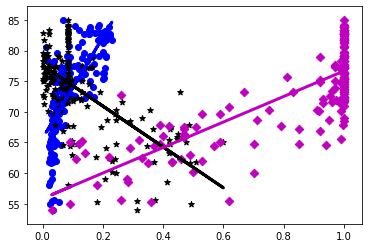

In [21]:
#Not Normalized Vectors 
#3 linear rows that in data
#m_2_1=linear_model.LinearRegression()
m_2_2=linear_model.LinearRegression()
m_2_3=linear_model.LinearRegression()
m_2_4=linear_model.LinearRegression()
#m_2_1.fit(X_2.iloc[:,0:1],y_2)
m_2_2.fit(X_2.iloc[:,1:2],y_2)
m_2_3.fit(X_2.iloc[:,2:3],y_2)
m_2_4.fit(X_2.iloc[:,3:4],y_2)
plt.scatter(x=X_2.iloc[:,1:2],y=y_2,c='b',marker='o')
plt.scatter(x=X_2.iloc[:,2:3],y=y_2,c='k',marker='*')
plt.scatter(x=X_2.iloc[:,3:4],y=y_2,c='m',marker='D')
plt.plot(X_2.iloc[:,1:2],m_2_2.predict(X_2.iloc[:,1:2].values.reshape(X_2.iloc[:,1:2].shape[0],1)),c='b',linewidth=3)
plt.plot(X_2.iloc[:,2:3],m_2_3.predict(X_2.iloc[:,2:3].values.reshape(X_2.iloc[:,2:3].shape[0],1)),c='k',linewidth=3)
plt.plot(X_2.iloc[:,3:4],m_2_4.predict(X_2.iloc[:,3:4].values.reshape(X_2.iloc[:,3:4].shape[0],1)),c='m',linewidth=3)